# Importing Libraries

In [1]:
import json
import numpy as np
import nltk
import pandas as pd
import tkinter as tk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# Load the intents data from the provided JSON
with open('intents.json', 'r') as f:
    data = json.load(f)

In [3]:
#getting all the data to lists
tag = []
patterns = []
responses = {}

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tag.append(intent['tag'])

In [4]:
#converting to dataframe
data_lists = pd.DataFrame({'patterns':patterns,'tag':tag})
data_lists

,patterns,tag
0,Hi,greeting
1,Hello,greeting
2,Hey,greeting
3,Can I book a room?,booking
4,How do I make a reservation?,booking
...,...,...
79,Is the beach within walking distance?,beach_access
80,Can I rent beach equipment at the hotel?,beach_access
81,"I lost something at the hotel, what should I do?",lost_and_found
82,Is there a lost and found at the hotel?,lost_and_found


In [5]:
data_lists = data_lists.sample(frac=1)

# Pre-Processing

Preprocessing such as removing punctuations, converting to lower case, encoding the textual data to numerical data are performed.

In [6]:
#removing punctuations
import string
data_lists['patterns'] = data_lists['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data_lists['patterns'] = data_lists['patterns'].apply(lambda wrd: ''.join(wrd))
data_lists

,patterns,tag
49,do you offer any special packages or deals,special_occasions
1,hello,greeting
16,whats the address of your hotel,location
20,what do i need to check in,check_in
11,what are my choices for rooms,room_types
...,...,...
46,what is your pet policy,pets
42,how often is housekeeping provided,cleaning
23,how do i check out,check_out
25,what is the latest time i can check out,late_checkout


TensorFlow's Tokenizer assigns a unique token to each distinct word and padding is done to get all the data to the same length so as to send it to an RNN layer.

In [7]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data_lists['patterns'])
train = tokenizer.texts_to_sequences(data_lists['patterns'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data_lists['tag'])

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [9]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  158
output length:  29


# Neural Network

The network cosist of an embedding layer which is one of the most powerful things in the field of natural language processing. The outputs of the embedding layer is the input of the recurrent layer with the LSTM gate. Then the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives a corresponding vector for each word in the dataset.

In [10]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [11]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
# training the model
train = model.fit(x_train,y_train,epochs=200) 

Epoch 1/200


3/3 [==============================] - 1s 6ms/step - loss: 3.3678 - accuracy: 0.0595
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3652 - accuracy: 0.0595
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3631 - accuracy: 0.0595
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3612 - accuracy: 0.0595
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3589 - accuracy: 0.0595
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3567 - accuracy: 0.0595
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3545 - accuracy: 0.0595
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3517 - accuracy: 0.0595
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3490 - accuracy: 0.0595
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 3.3463 - accuracy: 0.0595
Epoch 11/200
3/3 [=========

3/3 [==============================] - 0s 12ms/step - loss: 0.5132 - accuracy: 0.9048
Epoch 162/200
3/3 [==============================] - 0s 10ms/step - loss: 0.5097 - accuracy: 0.9048
Epoch 163/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5042 - accuracy: 0.9048
Epoch 164/200
3/3 [==============================] - 0s 14ms/step - loss: 0.4988 - accuracy: 0.9048
Epoch 165/200
3/3 [==============================] - 0s 13ms/step - loss: 0.4928 - accuracy: 0.9048
Epoch 166/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4892 - accuracy: 0.9048
Epoch 167/200
3/3 [==============================] - 0s 10ms/step - loss: 0.4833 - accuracy: 0.9048
Epoch 168/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4781 - accuracy: 0.8929
Epoch 169/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4754 - accuracy: 0.9048
Epoch 170/200
3/3 [==============================] - 0s 9ms/step - loss: 0.4715 - accuracy: 0.8929
Epoch 171/200
3

# Model Analysis

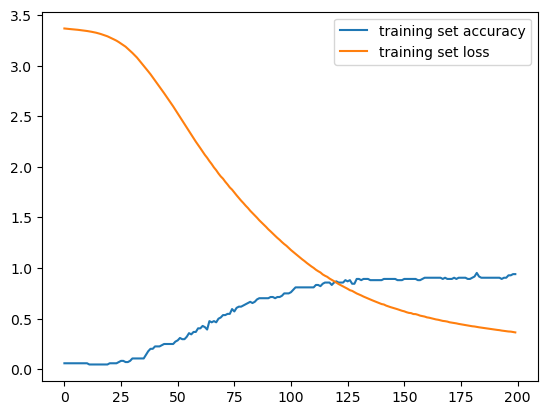

In [13]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

# Testing

Testing the model in a way to mimic a human interacting with a botand got positive results. However, this was very simple because of the small dataset I have used. But the same model can be used for big datasets.

In [14]:
#chatting
import random
while True:
    texts_p = []
    prediction_input = input('You : ')
    
    if prediction_input.lower() == 'quit':
        print("HOTELBOT: Goodbye!")
        break
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    if response_tag in responses:
        print("HOTELBOT : ", random.choice(responses[response_tag]))
    else:
        print("HOTELBOT : I'm sorry, I don't understand what you're saying.")

You : quit
HOTELBOT: Goodbye!
